### Neural Networks
#### We will apply neural network algorithms on the lending club cleaned and filtered dataset, that we have already cleaned and filtered considering our persona Rick who is a risk averse. We will use the dataset to predict the interest rate.
#### We will be performing
##### 1. MLPRegressor and check MAPE score
##### 2. MLPRegressor with learning rate tuning
##### 3. MLPRegressor with optimizer tuning
##### 4. MLPRegressor with epoch tuning

In [43]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

#### Reading the Data from the cleaned CSV

In [2]:
dataset = pd.read_csv('../Data/finaldataset.csv')

In [3]:
dataset.pop('Unnamed: 0')

0              0
1             18
2             21
3             25
4             33
5             51
6             59
7             64
8             69
9             76
10            80
11            88
12            90
13            93
14            98
15           110
16           115
17           123
18           128
19           137
20           152
21           156
22           166
23           170
24           171
25           174
26           178
27           184
28           185
29           196
           ...  
157902    886618
157903    886621
157904    886623
157905    886625
157906    886626
157907    886628
157908    886634
157909    886636
157910    886639
157911    886648
157912    886649
157913    886660
157914    886663
157915    886664
157916    886666
157917    886667
157918    886669
157919    886674
157920    886677
157921    886679
157922    886680
157923    886685
157924    886686
157925    886694
157926    886699
157927    886701
157928    886703
157929    8867

In [4]:
loan_status=dataset.pop('loan_status')

#### Checking the Info, Describe and head on the dataset

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157932 entries, 0 to 157931
Data columns (total 84 columns):
dti                           157932 non-null float64
revol_bal                     157932 non-null float64
total_pymnt                   157932 non-null float64
loan_amnt                     157932 non-null float64
sub_grade                     157932 non-null int64
annual_inc                    157932 non-null float64
acc_now_delinq                157932 non-null float64
delinq_2yrs                   157932 non-null float64
pub_rec                       157932 non-null float64
open_acc                      157932 non-null float64
inq_last_6mths                157932 non-null float64
revol_util                    157932 non-null float64
emp_length                    157932 non-null int64
addr_state_AL                 157932 non-null int64
addr_state_AR                 157932 non-null int64
addr_state_AZ                 157932 non-null int64
addr_state_CA                 15793

In [6]:
dataset.describe()

,dti,revol_bal,total_pymnt,loan_amnt,int_rate,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
count,157932.000000,1.579320e+05,157932.000000,157932.000000,157932.000000,157932.000000,1.579320e+05,157932.00000,157932.000000,157932.000000,...,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000,157932.000000
mean,18.046043,1.973237e+04,8465.719783,14397.327489,12.436624,10.422302,8.766437e+04,0.00630,0.314559,0.225971,...,0.013594,0.006484,0.002653,0.213440,0.552713,0.000063,0.000266,0.085803,0.361155,17.730147
std,8.678728,3.122720e+04,8446.508531,8783.155774,3.154233,4.382727,6.592817e+04,0.08842,0.857169,0.664907,...,0.115800,0.080261,0.051439,0.409737,0.497215,0.007957,0.016305,0.280073,0.480337,7.263190
min,0.000000,0.000000e+00,0.000000,1000.000000,5.320000,1.000000,4.000000e+03,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210970
25%,11.300000,6.502000e+03,1872.710000,7500.000000,10.000000,7.000000,5.000000e+04,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.048193
50%,17.800000,1.247050e+04,5813.350000,12000.000000,12.690000,11.000000,7.450000e+04,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.056891
75%,24.370000,2.369600e+04,12312.440000,20000.000000,14.650000,14.000000,1.080000e+05,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,23.809524
max,69.350000,2.904836e+06,51236.151003,35000.000000,19.200000,18.000000,6.100000e+06,6.00000,26.000000,86.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [7]:
dataset.head()

,dti,revol_bal,total_pymnt,loan_amnt,int_rate,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
0,27.65,13648.0,5861.071414,5000.0,10.65,7,24000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,20.833333
1,18.44,0.0,7164.499852,6000.0,11.71,8,84000.0,0.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,7.142857
2,13.22,32135.0,14025.400000,21000.0,12.42,9,105000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,20.000000
3,29.44,13707.0,15823.480000,15000.0,9.91,6,92000.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,16.304348
4,11.93,2224.0,5714.592129,5000.0,8.90,5,24044.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,20.795209


In [8]:
Y = dataset.pop('int_rate').values
Y

array([10.65, 11.71, 12.42, ...,  9.49, 11.99, 11.99])

In [9]:
X = dataset.values
X

array([[2.76500000e+01, 1.36480000e+04, 5.86107141e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.08333333e+01],
       [1.84400000e+01, 0.00000000e+00, 7.16449985e+03, ...,
        0.00000000e+00, 0.00000000e+00, 7.14285714e+00],
       [1.32200000e+01, 3.21350000e+04, 1.40254000e+04, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+01],
       ...,
       [2.56300000e+01, 6.36100000e+03, 2.87473000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 1.87500000e+01],
       [2.36900000e+01, 2.11100000e+04, 4.76625000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.90476190e+01],
       [1.08300000e+01, 3.32660000e+04, 7.94376000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 2.00000000e+01]])

#### Function for training, evaluating a model and calculating the error metrics

In [32]:
def get_result(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test) 
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    MAE = mean_absolute_error(Y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    MAPE_test = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
    MAPE_train = np.mean(np.abs((Y_train - y_train_pred) / Y_train)) * 100
    return MAE,RMSE, MAPE_test,MAPE_train, y_pred,y_train_pred, model

#### Test Train Split conventional way

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### Feed the model into the function and get the MAPE score

In [34]:
mlp= MLPRegressor()
mae, rmse, mape_test, mape_train, y_pred, y_train_pred, model = get_result(mlp,X_train, X_test, Y_train, Y_test)
mae, mape_test, mape_train

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.3875674489002057, 3.1481463399689984, 2.9723409722873377)

In [35]:
model.score

<bound method RegressorMixin.score of MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)>

No handles with labels found to put in legend.


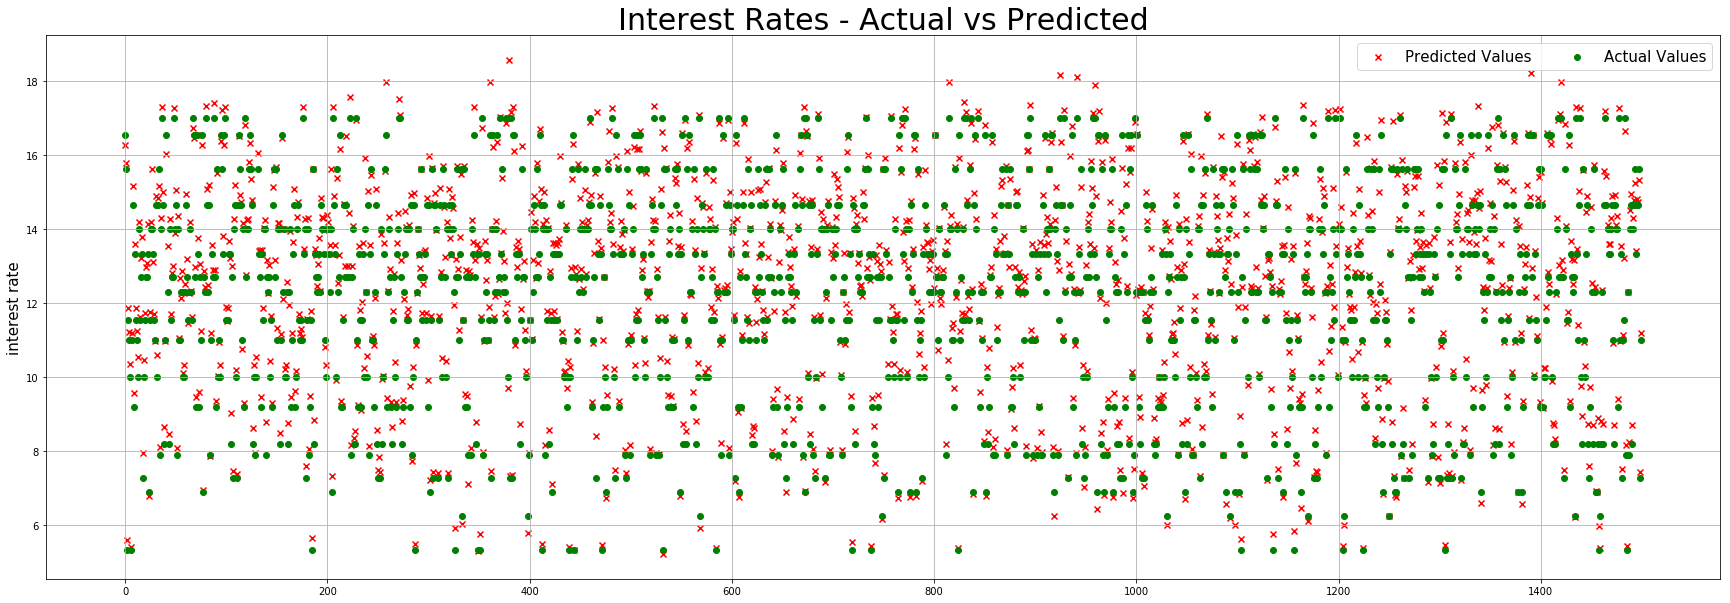

In [44]:
plt.figure(figsize=(30,10))
plt.legend()
plt.grid()
plt.title('Interest Rates - Actual vs Predicted',fontsize=30)
#plt.xlabel('loan profile',fontsize=15)
plt.ylabel('interest rate',fontsize=15)
a = plt.scatter(np.arange(1500),y_pred[:1500], color = 'red', marker='x')
b = plt.scatter(np.arange(1500),Y_test[:1500], color = 'green',marker='o')
plt.legend((a, b),
          ('Predicted Values', 'Actual Values'),
          scatterpoints=1,
          loc='upper right',
          ncol=3,
          fontsize=15)

#### Test Train Split K-Fold

In [37]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

MAE =[]
MAPE_TEST = []
MAPE_TRAIN = []
X_test_array=[]
y_pred_array=[]
Y_test_ret_array = []
Y_train_ret_array = []
y_train_pred_array=[]
mlp= MLPRegressor() # Model without any regularization
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    mae,rmse, mape_test, mape_train, y_pred, y_train_pred, model = get_result(mlp,X_train, X_test, Y_train, Y_test)
    MAE.append(mae)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    X_test_array.append(X_test)
    y_pred_array.append(y_pred)
    Y_train_ret_array.append(Y_train)
    y_train_pred_array.append(y_train_pred)
print("MAPE on test data is :", MAPE_TEST)
print("MAPE on train data is :", MAPE_TRAIN)

TRAIN: [ 31587  31588  31589 ... 157929 157930 157931] TEST: [    0     1     2 ... 31584 31585 31586]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [31587 31588 31589 ... 63171 63172 63173]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [63174 63175 63176 ... 94757 94758 94759]
TRAIN: [     0      1      2 ... 157929 157930 157931] TEST: [ 94760  94761  94762 ... 126343 126344 126345]
TRAIN: [     0      1      2 ... 126343 126344 126345] TEST: [126346 126347 126348 ... 157929 157930 157931]
MAPE on test data is : [5.331559371003653, 4.734319057586991, 3.1662374883586266, 2.4378092535387834, 3.9703973368639267]
MAPE on train data is : [2.4675785736077915, 2.7250767176950452, 3.1079294001791693, 3.3130702551047158, 3.112011764573869]


In [39]:
avg_MAPE_Test = sum(MAPE_TEST)/len(MAPE_TEST)
avg_MAPE_Test

3.928064501470396

In [40]:
avg_MAPE_Train = sum(MAPE_TRAIN)/len(MAPE_TRAIN)
avg_MAPE_Train

2.9451333422321175

In [42]:
avg_mae = np.mean(MAE)
avg_mae

0.4888918949901469

#### Regularization of  MLPRegressor

In [26]:
mlp

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
# mlp= MLPRegressor(hidden_layer_sizes=(10,4), max_iter=300, learning_rate='constant',solver='adam', tol=-1)

# rmse, mape, y_pred, y_train_pred, model = get_result(mlp,X_train, X_test, Y_train, Y_test)
# mape

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)
mlp_regressor = MLPRegressor()
param_grid = {'learning_rate': ['constant','adaptive','invscaling'],
              'solver': ['adam','lbfgs'],
    'activation' : ['identity', 'tanh', 'relu'],
    'max_iter': [100,200,300]}

# run grid search
grid_search = GridSearchCV(mlp_regressor, scoring="neg_mean_absolute_error", param_grid=param_grid, cv=5)
grid_search.fit(X, Y)

print(grid_search.score)

KFold(n_splits=5, random_state=None, shuffle=False)
<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': ['constant', 'adaptive', 'invscaling'], 'solver': ['adam', 'lbfgs'], 'activation': ['identity', 'tanh', 'relu'], 'max_iter': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)>


In [45]:
grid_search.best_params_

{'activation': 'identity',
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'lbfgs'}

In [46]:
grid_search.best_estimator_

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [47]:
grid_search.best_index_

5

In [48]:
grid_search.best_score_

-0.9409677217481953

In [50]:
usecases = dataset.sample(n=10,random_state=1)

In [51]:
usecases

,dti,revol_bal,total_pymnt,loan_amnt,sub_grade,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,...,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_income_ratio
140450,17.76,25396.0,4724.80000,28425.0,7,127000.0,0.0,0.0,0.0,12.0,...,0,0,0,1,1,0,0,0,0,22.381890
122636,23.87,13961.0,2608.98000,16000.0,9,110000.0,0.0,1.0,0.0,17.0,...,0,0,0,0,0,0,0,0,1,14.545455
95806,18.46,21859.0,0.00000,22000.0,10,91800.0,0.0,0.0,0.0,16.0,...,0,0,0,0,1,0,0,0,0,23.965142
87809,3.22,13523.0,11061.92206,10000.0,6,120000.0,0.0,0.0,0.0,11.0,...,0,0,0,0,1,0,0,0,0,8.333333
12352,19.59,11073.0,6824.00000,8500.0,6,83000.0,0.0,0.0,0.0,18.0,...,0,0,0,0,1,0,0,0,0,10.240964
79708,9.61,37803.0,10461.15000,15000.0,8,237510.0,0.0,2.0,0.0,14.0,...,0,0,0,0,1,0,0,0,0,6.315524
126353,24.28,7695.0,1143.10000,7000.0,9,30000.0,0.0,0.0,1.0,8.0,...,0,0,0,0,0,0,0,0,1,23.333333
141984,21.32,19065.0,7070.38000,30225.0,11,110000.0,0.0,0.0,0.0,18.0,...,0,0,0,1,1,0,0,0,0,27.477273
115590,21.19,4173.0,1245.52000,11750.0,18,45000.0,0.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,1,0,26.111111
141287,21.21,39577.0,1643.14000,10000.0,10,70000.0,0.0,0.0,0.0,22.0,...,0,0,0,0,1,0,0,0,0,14.285714
